In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
# Rename all the columns 
# View the dataset
df = pd.read_excel('HW5.xls')
df.columns = ['GPA', 'SAT_Math', 'SAT_Verbal', 'HS_Math', 'HS_English']
df

,GPA,SAT_Math,SAT_Verbal,HS_Math,HS_English
0,1.97,321,247,2.30,2.63
1,2.74,718,436,3.80,3.57
2,2.19,358,578,2.98,2.57
3,2.60,403,447,3.58,2.21
4,2.98,640,563,3.38,3.48
5,1.65,237,342,1.48,2.14
6,1.89,270,472,1.67,2.64
7,2.38,418,356,3.73,2.52
8,2.66,443,327,3.09,3.20
9,1.96,359,385,1.54,3.46


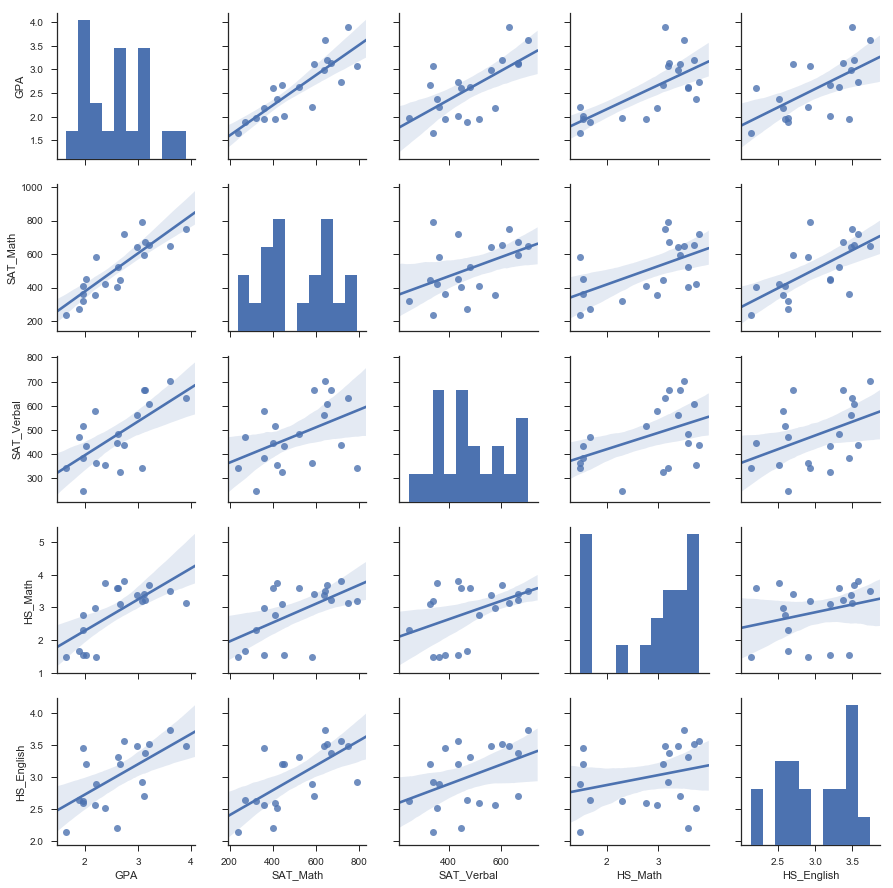

In [3]:
# Draw scatterplots for joint relationships and histograms for univariate distributions:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, kind="reg")
plt.show()

In [4]:
# Import the OLS model
# Set GPA as my dependent variable, all the other columns as independent variables
# Print out my OLS model stats result
results = smf.ols('GPA ~ SAT_Math + SAT_Verbal + HS_Math + HS_English', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     21.72
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           4.25e-06
Time:                        09:11:33   Log-Likelihood:                0.79507
No. Observations:                  20   AIC:                             8.410
Df Residuals:                      15   BIC:                             13.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1615      0.438      0.369      0.7

In [5]:
# Drop the irrelevant "intercept" and print out the t-values result
t = results.tvalues
t = t.drop(['Intercept'],axis=0)
t

SAT_Math      3.439467
SAT_Verbal    2.270444
HS_Math       2.062090
HS_English    0.496122
dtype: float64

In [6]:
# Find out the variables that are statiscally significant
print (t[t > 2])

SAT_Math      3.439467
SAT_Verbal    2.270444
HS_Math       2.062090
dtype: float64


In [7]:
tmax_key = t.idxmax()
tmax_value = t.loc[tmax_key]
print ("The most significant variable is", tmax_key, ", and its t-value is", tmax_value)

tmin_key = t.idxmin()
tmin_value = t.loc[tmin_key]
print ("The most insignificant variable is", tmin_key, ", and its t-value is", tmin_value)

The most significant variable is SAT_Math , and its t-value is 3.43946691293
The most insignificant variable is HS_English , and its t-value is 0.496122306692


In [8]:
# Generate and print the prediction dataset
predict_df = pd.DataFrame(
             [[680, 550, 3.8, 3.8],
              [650, 500, 3.0, 4],
              [450, 600, 2.5, 4.5],
              [503, 520, 3.25, 3.6],
              [750, 600, 3.95, 4]],
             index = ['Jacob', 'Kelly', 'Stuart', 'Jeremy', 'Linda'],
             columns = ['SAT_Math', 'SAT_Verbal', 'HS_Math', 'HS_English'])
predict_df

,SAT_Math,SAT_Verbal,HS_Math,HS_English
Jacob,680,550,3.80,3.8
Kelly,650,500,3.00,4.0
Stuart,450,600,2.50,4.5
Jeremy,503,520,3.25,3.6
Linda,750,600,3.95,4.0


In [9]:
# Import the improved OLS model
# Set GPA as my dependent variable, all the other columns as independent variables
# Print out my OLS model stats result
lm = smf.ols('GPA ~ SAT_Math + SAT_Verbal + HS_Math - 1', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     656.4
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           9.11e-18
Time:                        09:11:49   Log-Likelihood:               -0.35977
No. Observations:                  20   AIC:                             6.720
Df Residuals:                      17   BIC:                             9.707
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT_Math       0.0023      0.000      5.034      0.0

In [10]:
# Using the improved OLS model to predict 1Q_GPA
# Append the predicted result into the original data table
Predicted_GPA = lm.predict(predict_df)
predict_df['Predicted_GPA'] = pd.Series(Predicted_GPA, index = predict_df.index)
predict_df

,SAT_Math,SAT_Verbal,HS_Math,HS_English,Predicted_GPA
Jacob,680,550,3.80,3.8,3.284888
Kelly,650,500,3.00,4.0,2.960764
Stuart,450,600,2.50,4.5,2.557058
Jeremy,503,520,3.25,3.6,2.710301
Linda,750,600,3.95,4.0,3.559927


In [11]:
# Generate a new column into the original data table based on the value of Predicted_GPA
predict_df['Admission'] = np.where(predict_df['Predicted_GPA'] > 3, 'Yes', 'No')
predict_df

,SAT_Math,SAT_Verbal,HS_Math,HS_English,Predicted_GPA,Admission
Jacob,680,550,3.80,3.8,3.284888,Yes
Kelly,650,500,3.00,4.0,2.960764,No
Stuart,450,600,2.50,4.5,2.557058,No
Jeremy,503,520,3.25,3.6,2.710301,No
Linda,750,600,3.95,4.0,3.559927,Yes
